## Muralidhar Reddy

1. Create 5 28x28 pixel images of the first letter of your first name to be used for training. For instance, if the first character of your name is K, then create 5 versions of K and save these as 5 different 28x28 images.

  NOTE: You can do this using any drawing/photo software. Write your notes with a mouse.  (one example site is https://kleki.com/Links to an external site.. You can specify the image size as 28x28, set the background to black, and then the pen color to white and draw your letter). You can download this image as png file -- or use any image/drawing program you are familiar with). 

2. Create a notebook. Load the MNIST dataset (see the tutorial from class) and the supplied autencoder (digits.a5). Display the predictions for several random digits and compare these to the original. 

3. Create a new autoencoder, and train this autoencoder with the MNIST dataset, with your new images added (don't forget to oversample these images. Add enough copies to the MNIST dataset so that your model can identify your new character).

4. Demonstrate your new encoding by showing the autencoder recreate a random set of digits and your new character.

  The exercise is relatively easy if you understand the material in the in-class tutorial on autoencoders - so be sure you spend time reviewing the tutorial (try experimenting with it, get to know how things work). This exercise will challenge you to do so.

  Upload the following files:

  * Your 5 images 

  * Your notebook

  * A saved version of your trained autoencoder 

# Load the required libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
from tensorflow import keras

# Load and normalize the data

In [3]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


# Checking the test images and displaying in image format

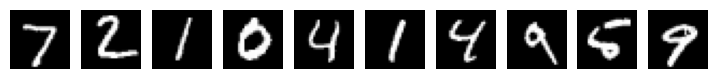

In [4]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

# Create an auto encoder model

In [5]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 16 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 16)                1616      
                                                                 
 dense_4 (Dense)             (None, 100)               1700      
                                                                 
 dense_5 (Dense)             (None, 300)               30300     
                                                                 
 dense_6 (Dense)             (None, 500)               1

# Train the autoencoder model

In [6]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 21s 40ms/step - loss: 0.1959 - val_loss: 0.1381
Epoch 2/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1304 - val_loss: 0.1233
Epoch 3/10
469/469 [==============================] - 20s 43ms/step - loss: 0.1209 - val_loss: 0.1173
Epoch 4/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1164 - val_loss: 0.1137
Epoch 5/10
469/469 [==============================] - 18s 39ms/step - loss: 0.1133 - val_loss: 0.1117
Epoch 6/10
469/469 [==============================] - 19s 40ms/step - loss: 0.1111 - val_loss: 0.1100
Epoch 7/10
469/469 [==============================] - 20s 43ms/step - loss: 0.1093 - val_loss: 0.1085
Epoch 8/10
469/469 [==============================] - 19s 40ms/step - loss: 0.1080 - val_loss: 0.1078
Epoch 9/10
469/469 [==============================] - 19s 40ms/step - loss: 0.1068 - val_loss: 0.1072
Epoch 10/10
469/469 [==============================] - 19s 40ms/step - loss: 0.105

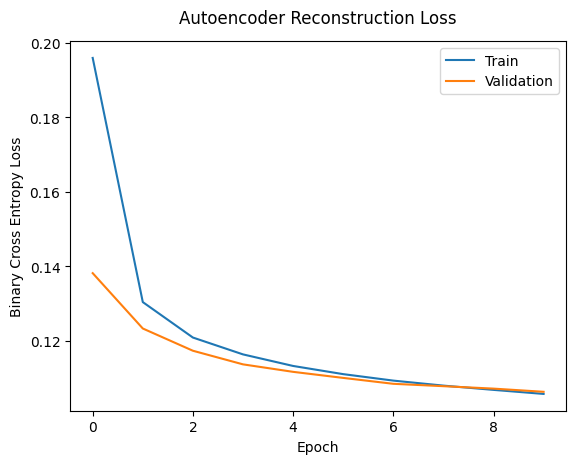

In [7]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

#Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 3s 7ms/step


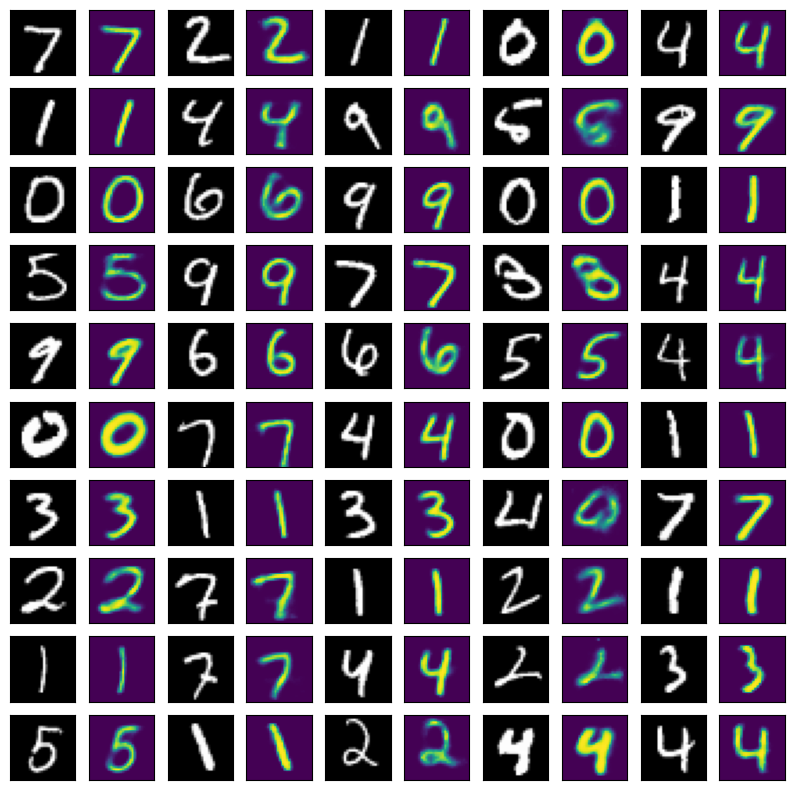

In [8]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

# Save the autoencoder for later user.

In [9]:
autoencoder.save('/content/drive/MyDrive/Colab Notebooks/USF DSP /initially_autoencoder.h5')

1/1 [==============================] - 0s 23ms/step
(1, 784)


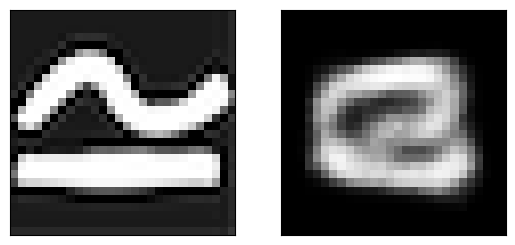

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/USF DSP /testimg02.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


1/1 [==============================] - 0s 23ms/step
(1, 784)


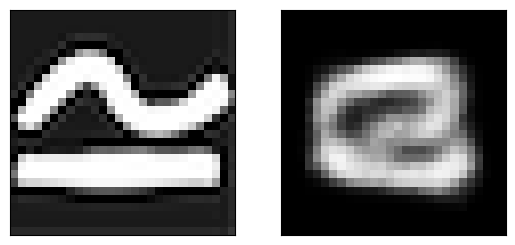

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/USF DSP /testimg01.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Testing the auto encoder model with created new image 1

1/1 [==============================] - 0s 23ms/step
(1, 784)


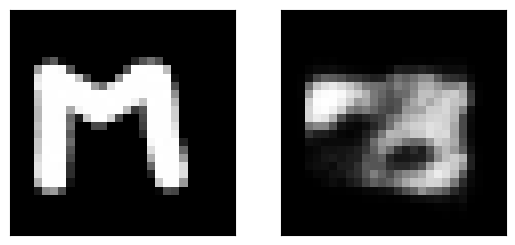

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/USF DSP /M1.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Testing the auto encoder model with created new image 2

1/1 [==============================] - 0s 23ms/step
(1, 784)


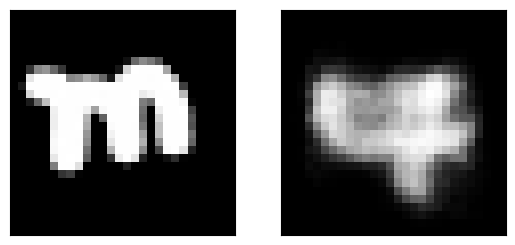

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/USF DSP /M2.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Testing the auto encoder model with created new image 3

1/1 [==============================] - 0s 25ms/step
(1, 784)


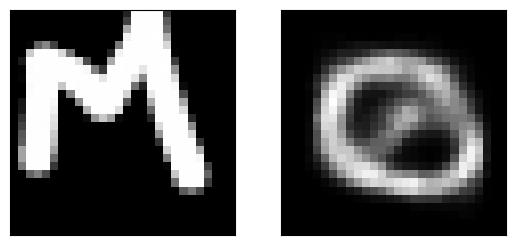

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/USF DSP /M3.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Testing the auto encoder model with created new image 4

1/1 [==============================] - 0s 39ms/step
(1, 784)


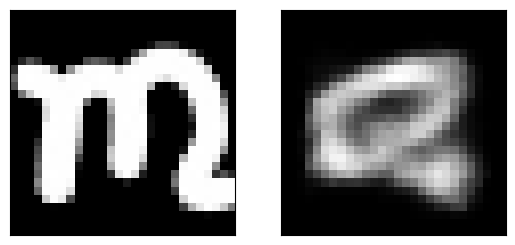

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/USF DSP /M4.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Testing the auto encoder model with created new image 5

1/1 [==============================] - 0s 24ms/step
(1, 784)


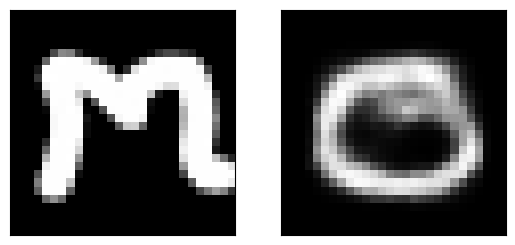

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/USF DSP /M5.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Test new image with saved model 

In [17]:
pretrained_model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/USF DSP /initially_autoencoder.h5')

# Testing the loaded auto encoder model with created new image 1

1/1 [==============================] - 0s 106ms/step
(1, 784)


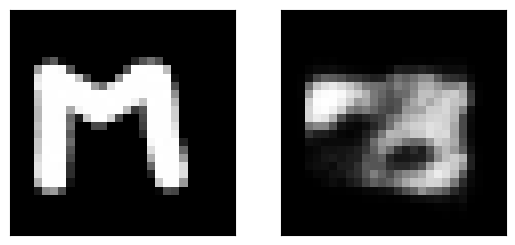

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/USF DSP /M1.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = pretrained_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Testing the loaded auto encoder model with created new image 2

1/1 [==============================] - 0s 44ms/step
(1, 784)


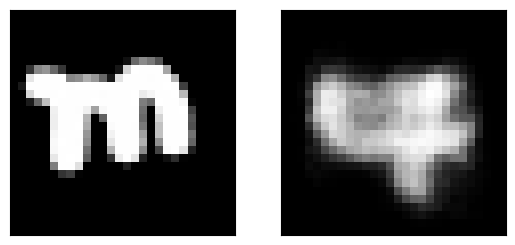

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/USF DSP /M2.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = pretrained_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Testing the loaded auto encoder model with created new image 3

1/1 [==============================] - 0s 32ms/step
(1, 784)


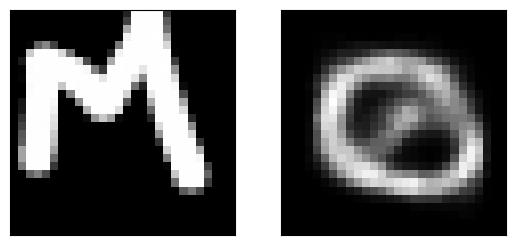

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/USF DSP /M3.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = pretrained_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Testing the loaded auto encoder model with created new image 4

1/1 [==============================] - 0s 39ms/step
(1, 784)


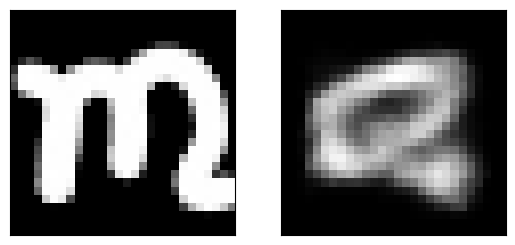

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/USF DSP /M4.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = pretrained_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Testing the loaded auto encoder model with created new image 5

1/1 [==============================] - 0s 35ms/step
(1, 784)


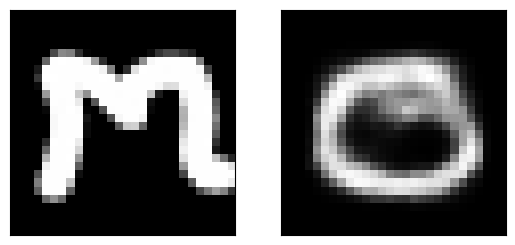

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/USF DSP /M5.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = pretrained_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


Continue training the pretrained autoencoder with only the new symbol

# Continue training the pretrained autoencoder with only the new symbol

1/1 [==============================] - 0s 33ms/step


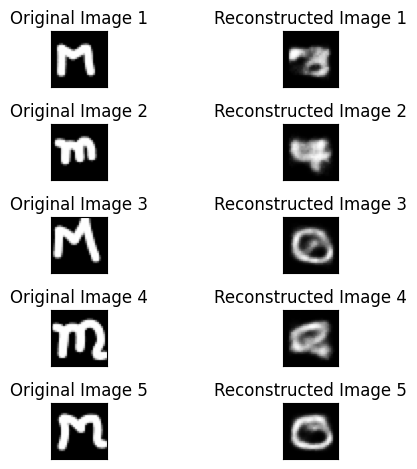

In [23]:
from tensorflow.keras.preprocessing import image
# Define target image size and color mode
target_size = (28, 28)
color_mode = "grayscale"
new_images = []
# Load 5 new images and display their predictions
for i in range(1, 6):
    # Load image
    img_path = f"/content/drive/MyDrive/Colab Notebooks/USF DSP /M{i}.png"
    img = image.load_img(img_path, target_size=target_size, color_mode=color_mode)

    # Convert image to array and normalize
    input_arr = image.img_to_array(img) / 255
    input_arr = input_arr.reshape(784)
    input_arr = np.array([input_arr])
    new_images.append(input_arr.reshape(784))

    # Get prediction
    predictions = pretrained_model.predict(input_arr)

    # Display original and reconstructed image
    plt.subplot(5, 2, 2*i-1)
    plt.imshow(img, cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(f"Original Image {i}")

    plt.subplot(5, 2, 2*i)
    plt.imshow(predictions[0].reshape(28,28), cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(f"Reconstructed Image {i}")

plt.tight_layout()
plt.show()


In [24]:

new_images = np.array(new_images)


new_images = np.repeat(new_images, 200, axis=0)

In [25]:
from tensorflow import keras
updated_model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/USF DSP /initially_autoencoder.h5')

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = pretrained_model.fit(
    x=new_images, # For autoencoders, both the input and the target are the same
    y=new_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images, new_images),
    callbacks=[early_stop]
)

Epoch 1/10
8/8 [==============================] - 2s 80ms/step - loss: 0.3594 - val_loss: 0.2313
Epoch 2/10
8/8 [==============================] - 0s 50ms/step - loss: 0.1926 - val_loss: 0.1617
Epoch 3/10
8/8 [==============================] - 0s 54ms/step - loss: 0.1517 - val_loss: 0.1421
Epoch 4/10
8/8 [==============================] - 0s 51ms/step - loss: 0.1399 - val_loss: 0.1377
Epoch 5/10
8/8 [==============================] - 0s 52ms/step - loss: 0.1370 - val_loss: 0.1362
Epoch 6/10
8/8 [==============================] - 0s 63ms/step - loss: 0.1358 - val_loss: 0.1354
Epoch 7/10
8/8 [==============================] - 0s 51ms/step - loss: 0.1352 - val_loss: 0.1350
Epoch 8/10
8/8 [==============================] - 0s 51ms/step - loss: 0.1350 - val_loss: 0.1349
Epoch 9/10
8/8 [==============================] - 0s 49ms/step - loss: 0.1348 - val_loss: 0.1348
Epoch 10/10
8/8 [==============================] - 0s 51ms/step - loss: 0.1347 - val_loss: 0.1347


1/1 [==============================] - 0s 24ms/step
(1, 784)


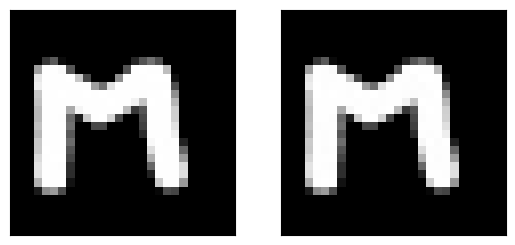

In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/USF DSP /M1.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = pretrained_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


1/1 [==============================] - 0s 34ms/step
(1, 784)


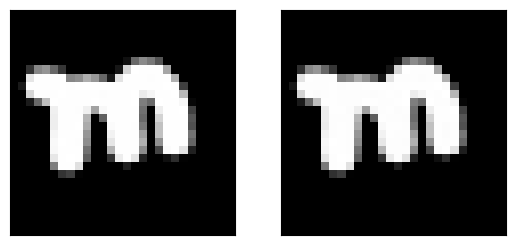

In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/USF DSP /M2.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = pretrained_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


1/1 [==============================] - 0s 23ms/step
(1, 784)


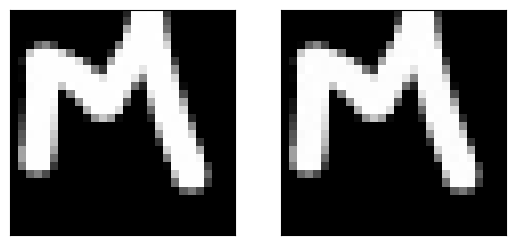

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/USF DSP /M3.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = pretrained_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


1/1 [==============================] - 0s 26ms/step
(1, 784)


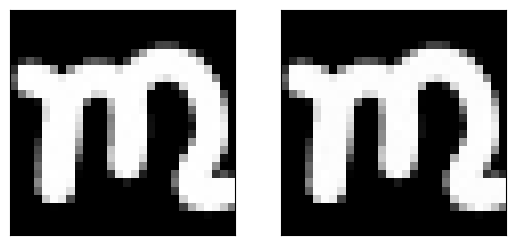

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/USF DSP /M4.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = pretrained_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


1/1 [==============================] - 0s 23ms/step
(1, 784)


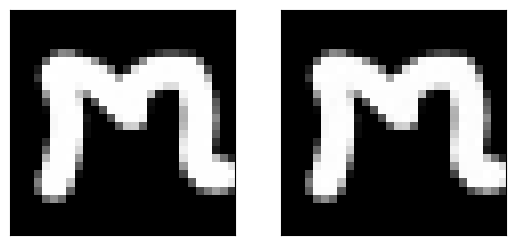

In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/USF DSP /M5.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = pretrained_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


#Test model new train

In [32]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


313/313 [==============================] - 1s 5ms/step


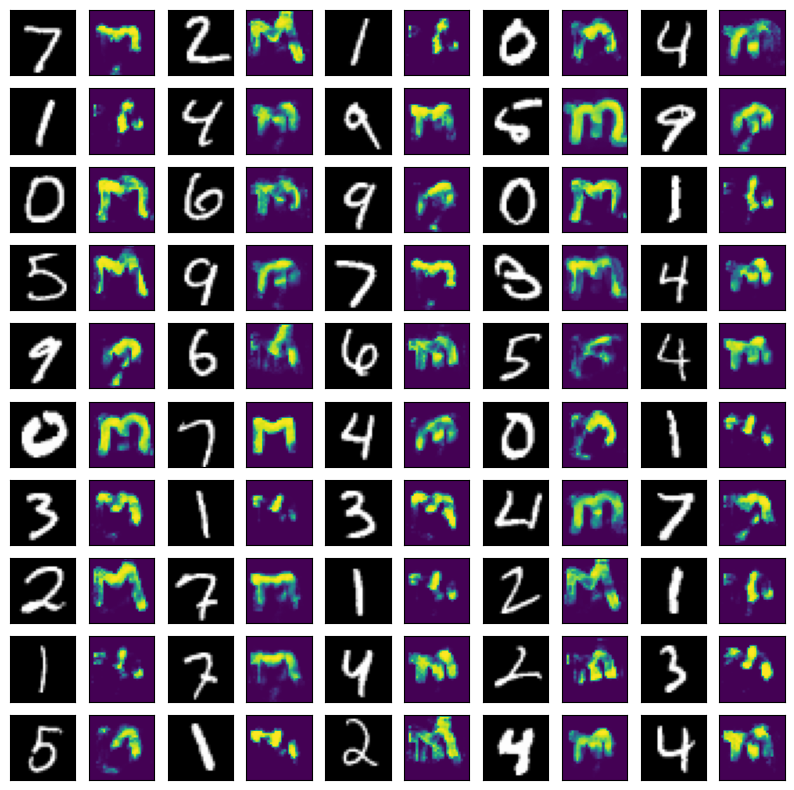

In [33]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

# Save the Best model based on comparison of test resluts of image

In [34]:
pretrained_model.save('/content/drive/MyDrive/Colab Notebooks/USF DSP /bestAutoEncoder.h5')

# Analysis
- As per assignmnet questions, firstly we loaded required libraires and loaded mnist data set [Modified National Institute of Standards and Technology database]
- In this assignmnet we used Autoencoder to detect the images model
- After loading the MNIST data set, split the data set as train and test
- check the properties of dataste like shape, images, labels ..etc
- Dispplyed few sample image susing matplotlib [this references from class notebooks]
- Now Create model of autoencoder layers and fit the fata set.
- After model train completed the test model with test results and display image of test.
- as per tasks in assignmnets we need to create few image of 28*28 pix of start leetter of name [using kleik]. Succesfuly created and used for next train
- Now Resample the 5 image and add to dataset.
- train the new dataste with already saved model
- Check the each  new created images prediction with new trained model. we got the best result in predicted model 
- Now save the model in .h5 
- After creating new image and send to intial model of autocnder resluts is not good.
- But when image is added to dataset and re trained on saved model .h5. we got good results.
- Our best model saved bestAutoencoder.h5